# Plot global distributions of errors for practical localization

In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import seaborn as sns
import xskillscore as xs
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import colors
from scipy import stats

In [2]:
## Where are we working
proj_dir = '/Users/zstanley/Documents/git_repos/obs_loc_for_scda'
plot_dir = proj_dir + '/plots/paper/'
my_data_dir = proj_dir + '/my_data/20151206.030000'
nb_dir = proj_dir + '/notebooks'

In [3]:
raisin_black = [45/256, 42/256, 50/256]
heliotrope_gray = [162/256, 155/256, 171/256]
pacific_blue = [37/256, 162/256, 192/256]
deep_saffron = [255/256, 145/256, 51/256]

In [4]:
ds = xr.open_dataset(my_data_dir+'/practical_loc_global_Ne80.nc')
plot_prefix = 'Ne80_'
plot_title_end = ', ens size = 80'

In [5]:
ens_size = 80
ds_opt = xr.open_dataset(my_data_dir+'/opt_loc_global_Ne'+str(ens_size)+'.nc')

In [6]:
keys = list(ds.data_vars)

In [7]:
keys

['error_unloc_atm_ast',
 'error_unloc_ocn_ast',
 'error_true_K_atm_ast',
 'error_true_K_ocn_ast',
 'error_practical_gcr_atm_ast',
 'error_practical_gcr_ocn_ast',
 'error_practical_cutoffloc_atm_ast',
 'error_practical_cutoffloc_ocn_ast',
 'error_unloc_atm_sst',
 'error_unloc_ocn_sst',
 'error_true_K_atm_sst',
 'error_true_K_ocn_sst',
 'error_practical_gcr_atm_sst',
 'error_practical_gcr_ocn_sst',
 'error_practical_cutoffloc_atm_sst',
 'error_practical_cutoffloc_ocn_sst']

In [8]:
for ii in (0,4,6):
    print(keys[ii])
    ds[keys[ii]+'_relative'] = 1 - ds[keys[ii]]/ds[keys[2]] 

error_unloc_atm_ast
error_practical_gcr_atm_ast
error_practical_cutoffloc_atm_ast


In [9]:
ds['error_practical_gcr_atm_sst'].min()

<xarray.DataArray 'error_practical_gcr_atm_sst' ()>
array(0.)

In [10]:
ds['error_true_K_atm_sst'].min()

<xarray.DataArray 'error_true_K_atm_sst' ()>
array(0.)

In [11]:
(ds['error_practical_gcr_atm_sst']/ds['error_true_K_atm_sst']).max()

<xarray.DataArray ()>
array(4.15890748e+20)

In [12]:
ds['error_practical_gcr_atm_ast_relative'].max()

<xarray.DataArray 'error_practical_gcr_atm_ast_relative' ()>
array(0.98532522)

In [13]:
for ii in (1, 5, 7):
    print(keys[ii])
    ds[keys[ii]+'_relative'] = 1 - ds[keys[ii]]/ds[keys[3]] 

error_unloc_ocn_ast
error_practical_gcr_ocn_ast
error_practical_cutoffloc_ocn_ast


In [14]:
for ii in (8,12,14):
    print(keys[ii])
    ds[keys[ii]+'_relative'] = 1 - ds[keys[ii]]/ds[keys[10]] 

error_unloc_atm_sst
error_practical_gcr_atm_sst
error_practical_cutoffloc_atm_sst


In [15]:
for ii in (9,13,15):
    print(keys[ii])
    ds[keys[ii]+'_relative'] = 1 - ds[keys[ii]]/ds[keys[11]] 

error_unloc_ocn_sst
error_practical_gcr_ocn_sst
error_practical_cutoffloc_ocn_sst


In [16]:
keys2 = list(ds.data_vars)
keys2 = keys2[16:]

In [17]:
keys2

['error_unloc_atm_ast_relative',
 'error_practical_gcr_atm_ast_relative',
 'error_practical_cutoffloc_atm_ast_relative',
 'error_unloc_ocn_ast_relative',
 'error_practical_gcr_ocn_ast_relative',
 'error_practical_cutoffloc_ocn_ast_relative',
 'error_unloc_atm_sst_relative',
 'error_practical_gcr_atm_sst_relative',
 'error_practical_cutoffloc_atm_sst_relative',
 'error_unloc_ocn_sst_relative',
 'error_practical_gcr_ocn_sst_relative',
 'error_practical_cutoffloc_ocn_sst_relative']

In [18]:
ds_opt['error_gcr_atm_ast_relative'] = 1 - ds_opt['error_gcr_atm_ast']/ds_opt['error_true_K_atm_ast']
ds_opt['error_gcr_atm_sst_relative'] = 1 - ds_opt['error_gcr_atm_sst']/ds_opt['error_true_K_atm_sst']
ds_opt['error_gcr_ocn_ast_relative'] = 1 - ds_opt['error_gcr_ocn_ast']/ds_opt['error_true_K_ocn_ast']
ds_opt['error_gcr_ocn_sst_relative'] = 1 - ds_opt['error_gcr_ocn_sst']/ds_opt['error_true_K_ocn_sst']

In [19]:
mask = ds['error_unloc_ocn_sst'] == 0

In [20]:
np.sum(mask)

<xarray.DataArray 'error_unloc_ocn_sst' ()>
array(39999)

In [21]:
np.sum(~mask)

<xarray.DataArray 'error_unloc_ocn_sst' ()>
array(24801)

In [22]:
hold = ds_opt['error_gcr_atm_ast_relative'].where(~mask).values.flatten()

In [23]:
hold[~np.isnan(hold)].min()

0.54480225

In [24]:
loc_errs_ast_atm   = 100*np.array([ds_opt['error_gcr_atm_ast_relative'].where(~mask).values.flatten(), ds[keys2[1]].where(~mask).values.flatten(),  ds[keys2[2]].where(~mask).values.flatten() ])
loc_errs_ast_ocn   = 100*np.array([ds_opt['error_gcr_ocn_ast_relative'].where(~mask).values.flatten(), ds[keys2[4]].where(~mask).values.flatten(),  ds[keys2[5]].where(~mask).values.flatten() ])
loc_errs_sst_atm   = 100*np.array([ds_opt['error_gcr_atm_sst_relative'].where(~mask).values.flatten(), ds[keys2[7]].where(~mask).values.flatten(),  ds[keys2[8]].where(~mask).values.flatten() ])
loc_errs_sst_ocn   = 100*np.array([ds_opt['error_gcr_ocn_sst_relative'].where(~mask).values.flatten(), ds[keys2[10]].where(~mask).values.flatten(), ds[keys2[11]].where(~mask).values.flatten()])

In [25]:
loc_errs_ast_atm[0,:][loc_errs_ast_atm[0,:]<np.nanpercentile(loc_errs_ast_atm[0,:], 0.5)] = np.nan
loc_errs_ast_atm[0,:][loc_errs_ast_atm[0,:]>np.nanpercentile(loc_errs_ast_atm[0,:], 99.5)] = np.nan
loc_errs_ast_ocn[0,:][loc_errs_ast_ocn[0,:]<np.nanpercentile(loc_errs_ast_ocn[0,:], 0.5)] = np.nan
loc_errs_ast_ocn[0,:][loc_errs_ast_ocn[0,:]>np.nanpercentile(loc_errs_ast_ocn[0,:], 99.5)] = np.nan
loc_errs_sst_atm[0,:][loc_errs_sst_atm[0,:]<np.nanpercentile(loc_errs_sst_atm[0,:], 0.5)] = np.nan
loc_errs_sst_atm[0,:][loc_errs_sst_atm[0,:]>np.nanpercentile(loc_errs_sst_atm[0,:], 99.5)] = np.nan
loc_errs_sst_ocn[0,:][loc_errs_sst_ocn[0,:]<np.nanpercentile(loc_errs_sst_ocn[0,:], 0.5)] = np.nan
loc_errs_sst_ocn[0,:][loc_errs_sst_ocn[0,:]>np.nanpercentile(loc_errs_sst_ocn[0,:], 99.5)] = np.nan

loc_errs_ast_atm[1,:][loc_errs_ast_atm[1,:]<np.nanpercentile(loc_errs_ast_atm[1,:], 0.5)] = np.nan
loc_errs_ast_atm[1,:][loc_errs_ast_atm[1,:]>np.nanpercentile(loc_errs_ast_atm[1,:], 99.5)] = np.nan
loc_errs_ast_ocn[1,:][loc_errs_ast_ocn[1,:]<np.nanpercentile(loc_errs_ast_ocn[1,:], 0.5)] = np.nan
loc_errs_ast_ocn[1,:][loc_errs_ast_ocn[1,:]>np.nanpercentile(loc_errs_ast_ocn[1,:], 99.5)] = np.nan
loc_errs_sst_atm[1,:][loc_errs_sst_atm[1,:]<np.nanpercentile(loc_errs_sst_atm[1,:], 0.5)] = np.nan
loc_errs_sst_atm[1,:][loc_errs_sst_atm[1,:]>np.nanpercentile(loc_errs_sst_atm[1,:], 99.5)] = np.nan
loc_errs_sst_ocn[1,:][loc_errs_sst_ocn[1,:]<np.nanpercentile(loc_errs_sst_ocn[1,:], 0.5)] = np.nan
loc_errs_sst_ocn[1,:][loc_errs_sst_ocn[1,:]>np.nanpercentile(loc_errs_sst_ocn[1,:], 99.5)] = np.nan

loc_errs_ast_atm[2,:][loc_errs_ast_atm[2,:]<np.nanpercentile(loc_errs_ast_atm[2,:], 0.5)] = np.nan
loc_errs_ast_atm[2,:][loc_errs_ast_atm[2,:]>np.nanpercentile(loc_errs_ast_atm[2,:], 99.5)] = np.nan
loc_errs_ast_ocn[2,:][loc_errs_ast_ocn[2,:]<np.nanpercentile(loc_errs_ast_ocn[2,:], 0.5)] = np.nan
loc_errs_ast_ocn[2,:][loc_errs_ast_ocn[2,:]>np.nanpercentile(loc_errs_ast_ocn[2,:], 99.5)] = np.nan
loc_errs_sst_atm[2,:][loc_errs_sst_atm[2,:]<np.nanpercentile(loc_errs_sst_atm[2,:], 0.5)] = np.nan
loc_errs_sst_atm[2,:][loc_errs_sst_atm[2,:]>np.nanpercentile(loc_errs_sst_atm[2,:], 99.5)] = np.nan
loc_errs_sst_ocn[2,:][loc_errs_sst_ocn[2,:]<np.nanpercentile(loc_errs_sst_ocn[2,:], 0.5)] = np.nan
loc_errs_sst_ocn[2,:][loc_errs_sst_ocn[2,:]>np.nanpercentile(loc_errs_sst_ocn[2,:], 99.5)] = np.nan

In [26]:
df_ast_atm = pd.DataFrame(loc_errs_ast_atm.T, columns =['GC', 'OneRad', 'Cutoff'] )
df_ast_ocn = pd.DataFrame(loc_errs_ast_ocn.T, columns =['GC', 'OneRad', 'Cutoff'] )
df_sst_atm = pd.DataFrame(loc_errs_sst_atm.T, columns =['GC', 'OneRad', 'Cutoff'] )
df_sst_ocn = pd.DataFrame(loc_errs_sst_ocn.T, columns =['GC', 'OneRad', 'Cutoff'] )

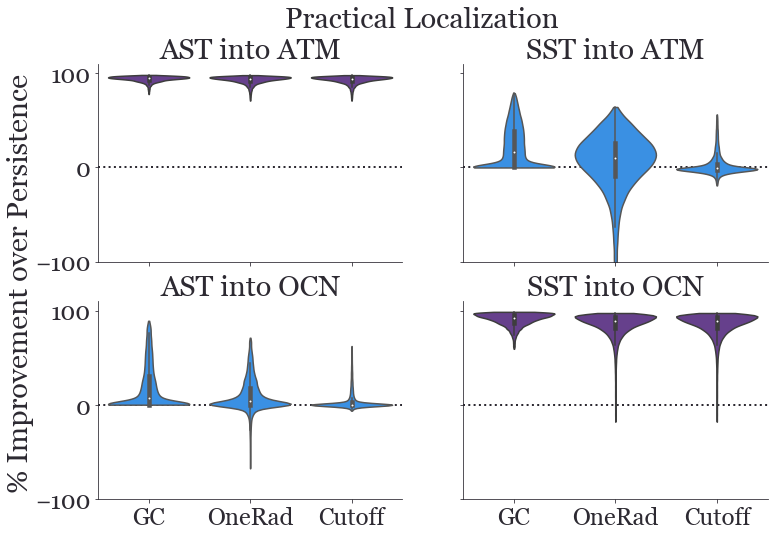

In [33]:
## Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True) 

# Zero lines
axs[0,0].axhline(0, color=raisin_black, linestyle=':', linewidth=2, zorder=1)
axs[0,1].axhline(0, color=raisin_black, linestyle=':', linewidth=2, zorder=1)
axs[1,0].axhline(0, color=raisin_black, linestyle=':', linewidth=2, zorder=1)
axs[1,1].axhline(0, color=raisin_black, linestyle=':', linewidth=2, zorder=1)

# Violin Plots
bars = sns.violinplot(data=df_ast_atm, cut=0, alpha=0.8, color='rebeccapurple', ax=axs[0,0], scale='width', zorder=2)
bars = sns.violinplot(data=df_ast_ocn, cut=0, alpha=0.8, color='dodgerblue',    ax=axs[1,0], scale='width', zorder=2)
bars = sns.violinplot(data=df_sst_atm, cut=0, alpha=0.8, color='dodgerblue',    ax=axs[0,1], scale='width', zorder=2)
bars = sns.violinplot(data=df_sst_ocn, cut=0, alpha=0.8, color='rebeccapurple', ax=axs[1,1], scale='width', zorder=2)

# Titles
fig.supylabel('% Improvement over Persistence', color=raisin_black)
fig.suptitle('Practical Localization', color=raisin_black)
axs[0,0].set_title('AST into ATM', color=raisin_black)
axs[0,1].set_title('SST into ATM', color=raisin_black)
axs[1,0].set_title('AST into OCN', color=raisin_black)
axs[1,1].set_title('SST into OCN', color=raisin_black)

# Adjust aesthetics
for ax in axs.reshape(-1):
    ax.spines['bottom'].set_color(raisin_black)
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(raisin_black)
    ax.xaxis.label.set_color(raisin_black)
    ax.yaxis.label.set_color(raisin_black)
    ax.tick_params(colors=raisin_black, which='both') 
    ax.set_ylim(-100, 110)

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.sans-serif':'Georgia'})
plt.rcParams.update({'font.size':24})
plt.savefig(plot_dir+'/'+plot_prefix+'ast_sst_practicalloc_errors_violin_plot.png',  bbox_inches='tight')
plt.show()

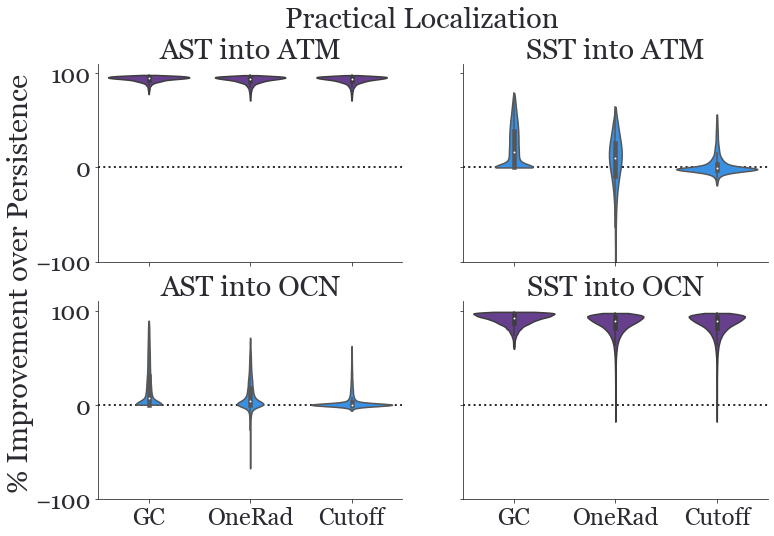

In [28]:
## Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True) 

# Zero lines
axs[0,0].axhline(0, color=raisin_black, linestyle=':', linewidth=2, zorder=1)
axs[0,1].axhline(0, color=raisin_black, linestyle=':', linewidth=2, zorder=1)
axs[1,0].axhline(0, color=raisin_black, linestyle=':', linewidth=2, zorder=1)
axs[1,1].axhline(0, color=raisin_black, linestyle=':', linewidth=2, zorder=1)

# Violin Plots
bars = sns.violinplot(data=df_ast_atm, cut=0, alpha=0.8, color='rebeccapurple', ax=axs[0,0], scale='area', zorder=2)
bars = sns.violinplot(data=df_ast_ocn, cut=0, alpha=0.8, color='dodgerblue',    ax=axs[1,0], scale='area', zorder=2)
bars = sns.violinplot(data=df_sst_atm, cut=0, alpha=0.8, color='dodgerblue',    ax=axs[0,1], scale='area', zorder=2)
bars = sns.violinplot(data=df_sst_ocn, cut=0, alpha=0.8, color='rebeccapurple', ax=axs[1,1], scale='area', zorder=2)

# Titles
fig.supylabel('% Improvement over Persistence', color=raisin_black)
fig.suptitle('Practical Localization', color=raisin_black)
axs[0,0].set_title('AST into ATM', color=raisin_black)
axs[0,1].set_title('SST into ATM', color=raisin_black)
axs[1,0].set_title('AST into OCN', color=raisin_black)
axs[1,1].set_title('SST into OCN', color=raisin_black)

# Adjust aesthetics
for ax in axs.reshape(-1):
    ax.spines['bottom'].set_color(raisin_black)
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(raisin_black)
    ax.xaxis.label.set_color(raisin_black)
    ax.yaxis.label.set_color(raisin_black)
    ax.tick_params(colors=raisin_black, which='both') 
    ax.set_ylim(-100, 110)

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.sans-serif':'Georgia'})
plt.rcParams.update({'font.size':24})
plt.savefig(plot_dir+'/'+plot_prefix+'ast_sst_practicalloc_errors_violin_plot.pdf',  bbox_inches='tight')
plt.show()

In [29]:
df_ast_atm.median()

GC        94.930244
OneRad    94.268318
Cutoff    94.268318
dtype: float32

In [30]:
df_ast_ocn.median()

GC        7.423365
OneRad    3.879529
Cutoff   -0.012982
dtype: float32

In [31]:
df_sst_atm.median()

GC        16.500950
OneRad     9.903574
Cutoff    -0.966084
dtype: float32

In [32]:
df_sst_ocn.median()

GC        92.417358
OneRad    88.367447
Cutoff    88.367447
dtype: float32